In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_parquet("data_sstep.parquet")
df

M1RigidBodyMotions  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1     [1.8349749633494485e-14, -4.6603045522036314e-...   
2     [-1.9887068202691416e-09, -7.323790584046052e-...   
3     [-1.9679280388110116e-09, -7.322313879572472e-...   
4     [-1.86500903773652e-09, -7.314687825371153e-09...   
...                                                 ...   
2996  [3.5122928842347154e-10, 9.685318089162628e-09...   
2997  [3.3256032871325475e-10, 9.680023615283914e-09...   
2998  [3.147064612151429e-10, 9.674308640701601e-09,...   
2999  [2.9729513426884507e-10, 9.6681212490587e-09, ...   
3000  [2.799046356876472e-10, 9.661410356844121e-09,...   

                                     M2RigidBodyMotions  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [-1.3193335642018218e-12, 3.8524457689844766e-...  
2     [-4.422974706961968e-08, 2.915444514307381e-08...  
3     [-4.418683782976856e-08, 2.913851538278469e-08...  
4     [-4.395739112342413e-08, 2.905528035983763e-08...  
...                                                 ...  
2996  [1.1515587375734861e-08, -3.142787237981383e-0...  
2997  [1.1613011842030996e-08, -3.0529701562798995e-...  
2998  [1.1704117268024057e-08, -2.965874863833708e-0...  
2999  [1.1786492164656219e-08, -2.8805097648511936e-...  
3000  [1.185736713734026e-08, -2.7957881333403957e-0...  

[3001 rows x 2 columns]

In [13]:
t = np.arange(len(df))/1000
m1_rbm = np.vstack(df["M1RigidBodyMotions"]).reshape(-1,7,6)
m2_rbm = np.vstack(df["M2RigidBodyMotions"]).reshape(-1,7,6)

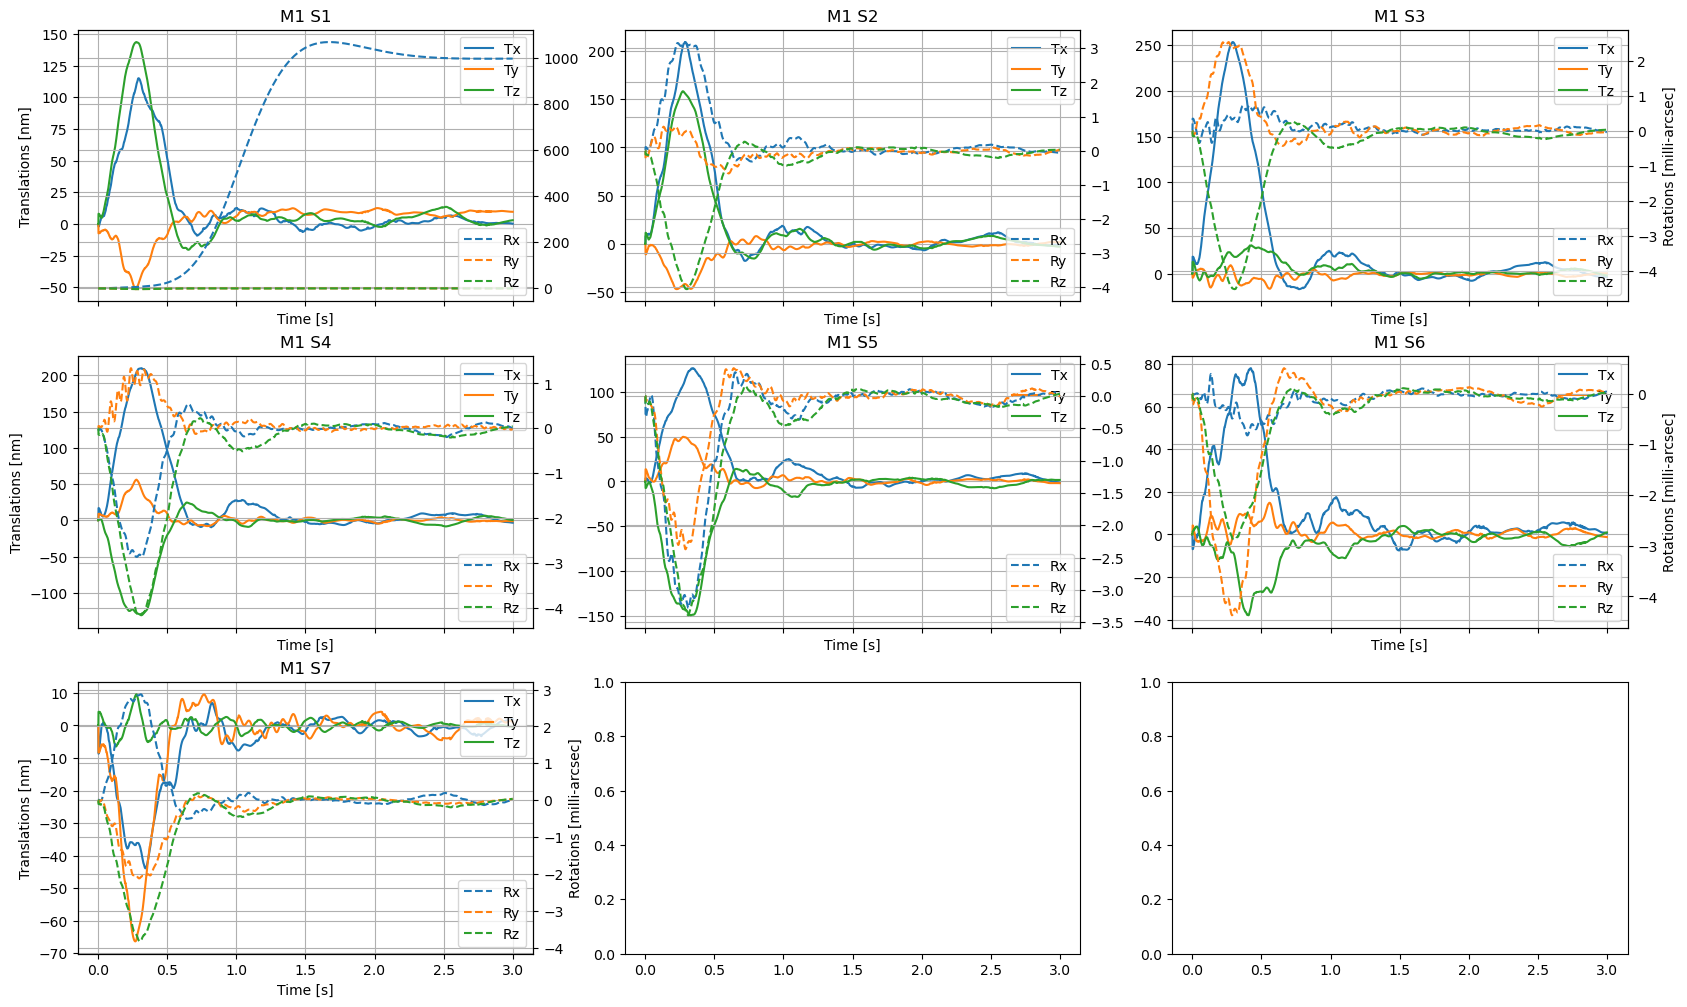

In [14]:
fig, axs = plt.subplots(ncols=3,nrows=3, sharex=True,  figsize = (20,12))
axs = axs.ravel()
for i in range(1,8):
    ax = axs[i-1]
    ax.plot(t,m1_rbm[:,i-1,:3]*1e9)
    ax.legend(["Tx","Ty","Tz"],loc=1)
    ax.grid()
    ax.set_xlabel("Time [s]")
    if i==1 or i==4 or i==7:
        ax.set_ylabel("Translations [nm]")
    ax.set_title(f"M1 S{i}")
    axo = ax.twinx() 
    axo.plot(t,m1_rbm[:,i-1,3:]*180*3600e3/np.pi,'--')
    axo.legend(["Rx","Ry","Rz"],loc=4)
    axo.grid()
    if i==3 or i==6 or i==7:
        axo.set_ylabel("Rotations [milli-arcsec]")


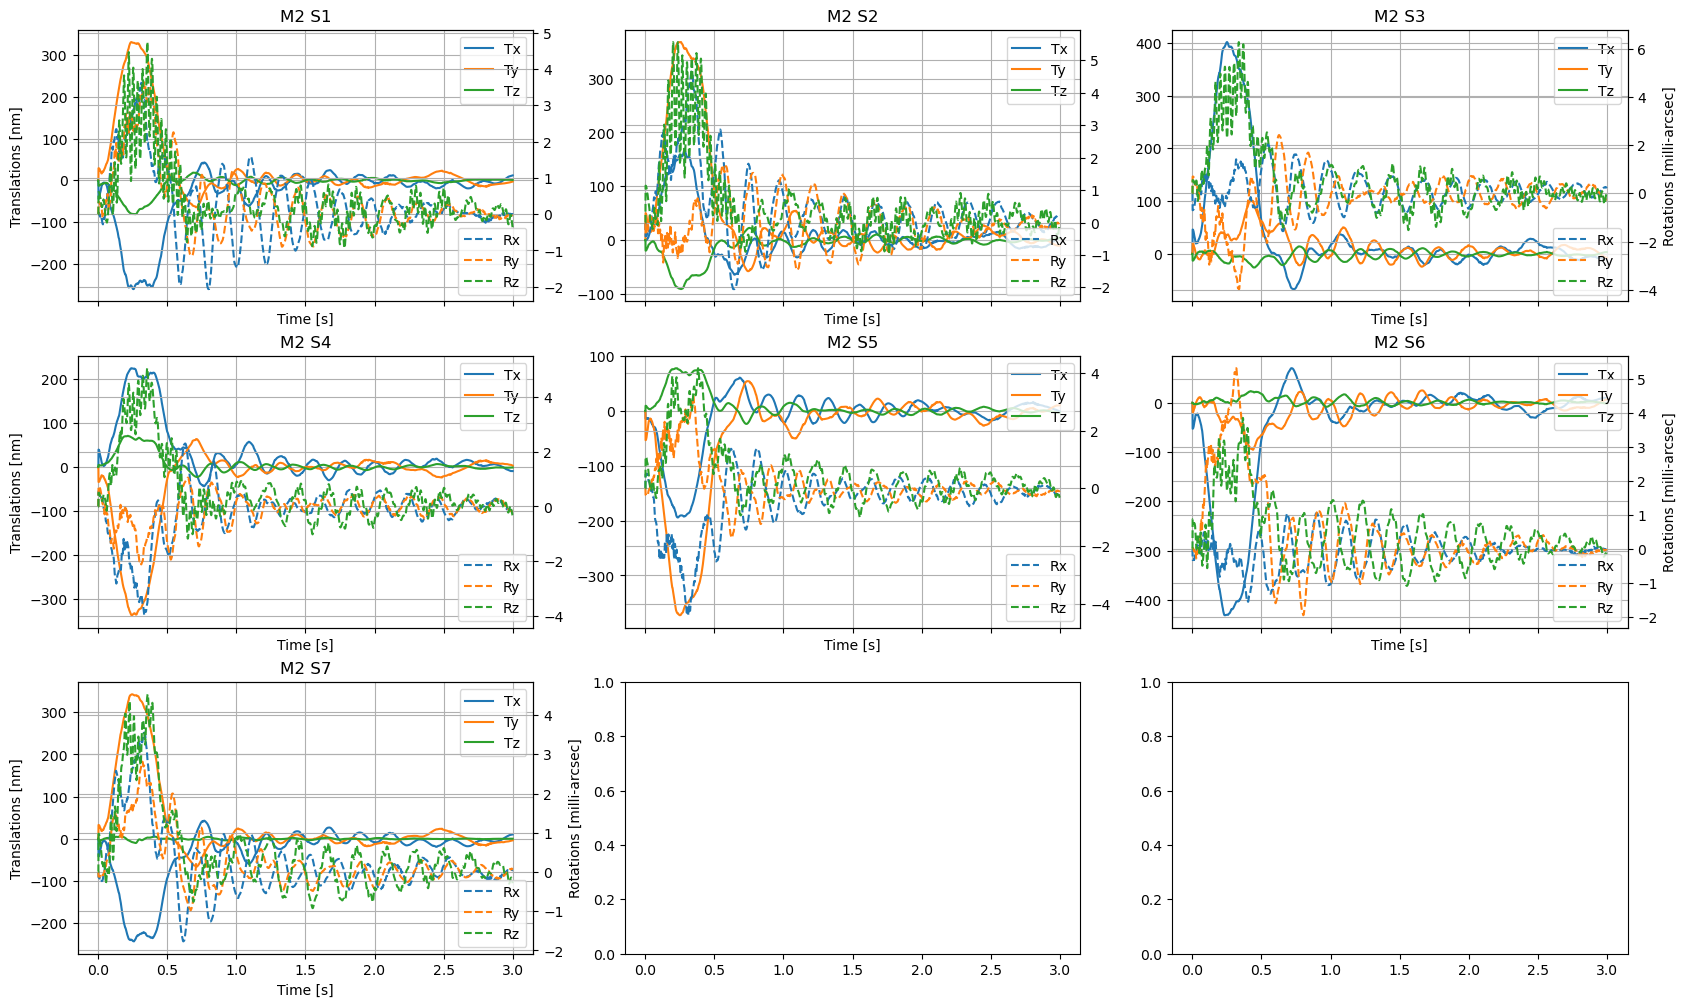

In [15]:
fig, axs = plt.subplots(ncols=3,nrows=3, sharex=True,  figsize = (20,12))
axs = axs.ravel()
for i in range(1,8):
    ax = axs[i-1]
    ax.plot(t,m2_rbm[:,i-1,:3]*1e9)
    ax.legend(["Tx","Ty","Tz"],loc=1)
    ax.grid()
    ax.set_xlabel("Time [s]")
    if i==1 or i==4 or i==7:
        ax.set_ylabel("Translations [nm]")
    ax.set_title(f"M2 S{i}")
    axo = ax.twinx() 
    axo.plot(t,m2_rbm[:,i-1,3:]*180*3600e3/np.pi,'--')
    axo.legend(["Rx","Ry","Rz"],loc=4)
    axo.grid()
    if i==3 or i==6 or i==7:
        axo.set_ylabel("Rotations [milli-arcsec]")
